In [2]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Cars24 E2E\code\Training_FileFromDB\InputFile.csv')

In [3]:
df.head(5)

,Sl_No,Full_Info,Transmission_Type,Ownership,Fuel_Used,brand_name,km_driven,selling_price,Year_of_Manufacture,Place_of_Origin,Age
0,0,"""2015 Maruti Swift""","""Manual""","""1st Owner""","""Diesel""","""Maruti-Swift""",46245,432499,2015,"""New_Delhi""",7
1,1,"""2012 Maruti Swift""","""Manual""","""1st Owner""","""Petrol""","""Maruti-Swift""",95779,383499,2012,"""New_Delhi""",10
2,2,"""2012 Maruti Swift""","""Manual""","""3rd Owner""","""Petrol""","""Maruti-Swift""",12761,371599,2012,"""New_Delhi""",10
3,3,"""2018 Maruti Alto 800""","""Manual""","""1st Owner""","""Petrol""","""Maruti-Alto""",41575,323699,2018,"""New_Delhi""",4
4,4,"""2015 Maruti Swift""","""Manual""","""1st Owner""","""Diesel""","""Maruti-Swift""",89851,392899,2015,"""New_Delhi""",7


In [4]:
final_df = df.copy()

In [5]:
final_df.drop(final_df.columns[[0, 1, 5, 8, 9]], axis=1,inplace = True)

In [6]:
final_df

,Transmission_Type,Ownership,Fuel_Used,km_driven,selling_price,Age
0,"""Manual""","""1st Owner""","""Diesel""",46245,432499,7
1,"""Manual""","""1st Owner""","""Petrol""",95779,383499,10
2,"""Manual""","""3rd Owner""","""Petrol""",12761,371599,10
3,"""Manual""","""1st Owner""","""Petrol""",41575,323699,4
4,"""Manual""","""1st Owner""","""Diesel""",89851,392899,7
...,...,...,...,...,...,...
4763,"""Manual""","""1st Owner""","""Petrol""",30051,344999,3
4764,"""Manual""","""1st Owner""","""Petrol""",31787,344999,3
4765,"""Manual""","""1st Owner""","""Petrol""",12651,694799,3
4766,"""Manual""","""1st Owner""","""Petrol""",42126,310299,4


In [11]:
df3 = final_df[~final_df.Transmission_Type.str.contains('nan')].copy()

In [13]:
df3["Transmission_Type"].value_counts()

"Manual"       3956
"Automatic"     765
Name: Transmission_Type, dtype: int64

In [18]:
def one_hot_encoding(df45):
    df55 = df45.copy()
    dfdummies = pd.get_dummies(data=df55,columns=['Transmission_Type','Ownership','Fuel_Used'],drop_first=True)
    return dfdummies

In [19]:
new_df = one_hot_encoding(df3)

In [20]:
new_df.head(3)

,km_driven,selling_price,Age,"Transmission_Type_""Manual""","Ownership_""2nd Owner""","Ownership_""3rd Owner""","Ownership_""4th Owner""","Fuel_Used_""Petrol + CNG""","Fuel_Used_""Petrol + LPG""","Fuel_Used_""Petrol"""
0,46245,432499,7,1,0,0,0,0,0,0
1,95779,383499,10,1,0,0,0,0,0,1
2,12761,371599,10,1,0,1,0,0,0,1


In [21]:
X=new_df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=new_df.iloc[:,1]

In [22]:
#### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [23]:
print(model.feature_importances_)

[4.54212840e-01 2.39142660e-01 1.61536918e-01 1.23108197e-02
 4.27030345e-03 1.38107200e-05 1.25251324e-02 9.12267651e-05
 1.15896289e-01]


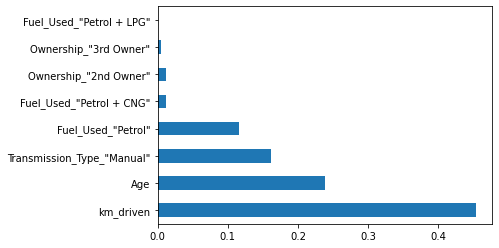

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [26]:
X.head(1)

,km_driven,Age,"Transmission_Type_""Manual""","Ownership_""2nd Owner""","Ownership_""3rd Owner""","Ownership_""4th Owner""","Fuel_Used_""Petrol + CNG""","Fuel_Used_""Petrol + LPG""","Fuel_Used_""Petrol"""
0,46245,7,1,0,0,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,[0,1,2,8]], y, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
regressor=RandomForestRegressor()

In [31]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 10000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [55]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [1, 910, 1819, 2728, 3637, 4546, 5455, 6364, 7273, 8182, 9091, 10000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [57]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [58]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=7273; total time=  17.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=7273; total time=  17.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=7273; total time=  30.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=7273; total time=  31.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=7273; total time=  30.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=9091; total time=  40.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=9091; total time=  27.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [1, 910, 1819, 2728,
                                                         3637, 4546, 5455, 6364,
                                                         7273, 8182, 9091,
                                                         10000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [59]:
rf_random.best_params_

{'n_estimators': 5455,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [60]:
rf_random.best_score_

-55187248446.20036

In [3]:
df = pd.read_csv(r'C:\Users\ADMIN\Desktop\Cars24 E2E\code\Training_Batch_Files\file9_semicleaned.csv')

In [6]:
df.head(2)

,Sl_No,Full_Info,Transimission_Type,Ownership,Fuel_Used,brand_name,km_driven,selling_price,Year_of_Manuacture,Place_of_Origin,Age
0,0,"""2015 Maruti Swift""","""Manual""","""1st Owner""","""Diesel""","""Maruti-Swift""",46245,432499,2015,"""New_Delhi""",7
1,1,"""2012 Maruti Swift""","""Manual""","""1st Owner""","""Petrol""","""Maruti-Swift""",95779,383499,2012,"""New_Delhi""",10


In [10]:
df['Transimission_Type'].value_counts()

"Manual"       3956
"Automatic"     765
Name: Transimission_Type, dtype: int64

In [14]:
for column in df:
    print(len(df[column]))

4768
4768
4768
4768
4768
4768
4768
4768
4768
4768
4768


In [18]:
df.isnull().values.any()

True

In [20]:
df.isna().sum()

Sl_No                  0
Full_Info              0
Transimission_Type    47
Ownership              0
Fuel_Used              0
brand_name             0
km_driven              0
selling_price          0
Year_of_Manuacture     0
Place_of_Origin        0
Age                    0
dtype: int64

In [21]:
df2 = df.dropna()

In [22]:
df2.isna().sum()

Sl_No                 0
Full_Info             0
Transimission_Type    0
Ownership             0
Fuel_Used             0
brand_name            0
km_driven             0
selling_price         0
Year_of_Manuacture    0
Place_of_Origin       0
Age                   0
dtype: int64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4721 entries, 0 to 4767
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sl_No               4721 non-null   int64 
 1   Full_Info           4721 non-null   object
 2   Transimission_Type  4721 non-null   object
 3   Ownership           4721 non-null   object
 4   Fuel_Used           4721 non-null   object
 5   brand_name          4721 non-null   object
 6   km_driven           4721 non-null   int64 
 7   selling_price       4721 non-null   int64 
 8   Year_of_Manuacture  4721 non-null   int64 
 9   Place_of_Origin     4721 non-null   object
 10  Age                 4721 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 442.6+ KB
